In [1]:
import sys
import os
import importlib

current_dir = os.getcwd()

project_root = os.path.abspath(os.path.join(current_dir, ".."))

if project_root not in sys.path:
    sys.path.append(project_root)

import files
importlib.reload(files)

import utils
importlib.reload(utils)

from files import *
from utils import *


In [7]:
# Concaténer tous les Text
Text_list = [globals()[f"Text_{year}"] for year in files6.keys()]
Text_combined = pd.concat(Text_list, ignore_index=True)

# Concaténer tous les hum
hum_list = [globals()[f"hum_{year}"] for year in files7.keys()]
Hum_combined = pd.concat(hum_list, ignore_index=True)

# Concaténer tous les wind
wind_list = [globals()[f"wind_{year}"] for year in files7.keys()]
Wind_combined = pd.concat(wind_list, ignore_index=True)

# Concaténer tous les solar
solar_list = [globals()[f"solar_{year}"] for year in files7.keys()]
Solar_combined = pd.concat(solar_list, ignore_index=True)

# Concaténer tous les ground
ground_list = [globals()[f"ground_{year}"] for year in files7.keys()]
Ground_combined = pd.concat(ground_list, ignore_index=True)

# Concaténer tous les Tint
Tint_list = [globals()[f"Tint_{year}"] for year in files6.keys()]
Tint_combined = pd.concat(Tint_list, ignore_index=True)


In [11]:
occupation=extract_columns("../data/simulated_data_7years/Mal_isole/Occupancy_per_hour",1)
occupation_7years = pd.concat([occupation] * 7, ignore_index=True)
Text_Tint_Hum_Occup = pd.concat([Text_combined.reset_index(drop=True),Tint_combined.reset_index(drop=True),Hum_combined.reset_index(drop=True) ,occupation_7years.reset_index(drop=True)], axis=1)


In [18]:
clustering_heat = pd.read_csv("../data/simulated_data_7years/conso_kmeans_data/clusters_heat_toulouse_kmeans")

df=pd.read_csv("../data/simulated_data_7years/conso_kmeans_data/resultat_prediction_profil_7years.csv")


In [19]:
Test_Text_Tint_Hum_Occup = df.tail(int(len(df) * 0.2))

In [41]:
Text_Tint_Hum_Occup_24_profil_heat

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,9.060,8.930,8.500,8.140,7.985,7.810,7.800,7.810,7.950,8.760,...,0.000000,0.000000,111.583930,126.282167,141.690642,292.313880,435.712715,581.345023,708.723169,819.316347
1,9.500,9.200,8.975,8.840,8.770,8.620,8.660,8.930,9.170,9.260,...,1317.883782,1296.447431,1159.674200,1080.722404,1008.514718,1016.661756,1013.587586,1034.633213,1057.571689,1062.345863
2,13.715,13.685,13.870,14.490,15.240,15.570,15.760,15.765,15.485,15.330,...,0.000000,0.000000,0.000000,0.000000,35.292972,143.280355,292.101629,418.037287,498.389887,542.913236
3,13.885,14.855,15.375,15.390,15.465,15.500,15.530,15.540,15.495,15.550,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,12.245,12.035,11.640,11.025,10.375,9.815,9.370,9.015,8.880,9.885,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,6.590,6.480,6.280,6.235,6.215,6.090,5.925,5.740,5.530,5.370,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.647182,372.899931,638.301993
2551,3.025,2.570,2.105,1.640,1.165,0.835,0.600,0.355,0.255,0.015,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.881524
2552,1.180,0.855,0.530,0.130,-0.230,-0.565,-0.910,-1.245,-1.405,-1.105,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2553,1.145,0.350,-0.360,-0.480,-0.235,-0.165,-0.150,-0.035,0.020,0.145,...,589.733137,438.356419,425.641458,529.009112,951.838357,1243.980939,1454.312734,1626.560801,1786.121432,1922.778444


In [43]:
Text_Tint_Hum_Occup_24_profil_heat = Text_Tint_Hum_Occup.copy()
Text_Tint_Hum_Occup_24_profil_heat['heat_on'] = clustering_heat['heat_on']
Text_Tint_Hum_Occup_24_profil_heat['clusters'] = clustering_heat['clusters']
Text_Tint_Hum_Occup_24_profil_heat = pd.concat([Text_Tint_Hum_Occup_24_profil_heat, clustering_heat.iloc[:, :-2]], axis=1).reset_index(drop=True)
Text_Tint_Hum_Occup_24_profil_heat.columns = Text_Tint_Hum_Occup_24_profil_heat.columns.astype(str)
Text_Tint_Hum_Occup_24_profil_heat2=downsample_majority_class(Text_Tint_Hum_Occup_24_profil_heat,'heat_on')


df2 = Text_Tint_Hum_Occup_24_profil_heat2.copy()
scaler_temp2 = StandardScaler() 
scaler_cons2 = StandardScaler()
df_scaled2 = np.hstack([
    scaler_temp2.fit_transform(df2.iloc[:, :-26]),   
    df2.iloc[:, -26:-25].values, 
    df2.iloc[:,  -25:-24].values,
    scaler_cons2.fit_transform(df2.iloc[:, -24:]),  
])
df_final2 = pd.DataFrame(df_scaled2, columns=df2.columns)
data2 = df_final2.values  

df3 = Text_Tint_Hum_Occup_24_profil_heat.copy()
scaler_temp3 = StandardScaler() 
scaler_cons3 = StandardScaler()
df_scaled3 = np.hstack([
    scaler_temp3.fit_transform(df3.iloc[:, :-26]),   
    df3.iloc[:, -26:-25].values, 
    df3.iloc[:, -25:-24].values,
    scaler_cons3.fit_transform(df3.iloc[:, -24:]),  
])
df_final3 = pd.DataFrame(df_scaled3, columns=df3.columns)
data3 = df_final3.values  

time_steps = 1  

X2, y2 = [], []
for i in range(1,len(data2) ):
    X2.append(np.hstack([data3[i-1, :], data2[i, :-24]])) 
    y2.append(data2[i,-24:]) 
X2, y2 = np.array(X2), np.array(y2)

print("Shape of X:", X2.shape) 
print("Shape of y:", y2.shape) 

X2 = X2.reshape(X2.shape[0], 1, X2.shape[1]) 

X_train2=X2[:int((X2.shape[0]*8)/10),:]
X_test2=X2[int((X2.shape[0]*8)/10):,:]
y_train2=y2[:int((y2.shape[0]*8)/10),:]
y_test2=y2[int((y2.shape[0]*8)/10):,:]

Shape of X: (1871, 220)
Shape of y: (1871, 24)


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.8956 - mae: 0.6915 - mse: 0.8956 - val_loss: 0.5643 - val_mae: 0.5401 - val_mse: 0.5643
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6165 - mae: 0.5336 - mse: 0.6165 - val_loss: 0.4234 - val_mae: 0.4161 - val_mse: 0.4234
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4785 - mae: 0.4443 - mse: 0.4785 - val_loss: 0.3681 - val_mae: 0.3765 - val_mse: 0.3681
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3989 - mae: 0.4027 - mse: 0.3989 - val_loss: 0.3321 - val_mae: 0.3538 - val_mse: 0.3321
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3728 - mae: 0.3888 - mse: 0.3728 - val_loss: 0.3330 - val_mae: 0.3529 - val_mse: 0.3330
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3561 - mae: 0.3817 - mse: 0.3561 - val_loss: 0.2907 - val_mae: 0.3276 - val_mse: 0.2907
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3119 - mae: 0.3581 - mse: 0.3119 - val_loss:

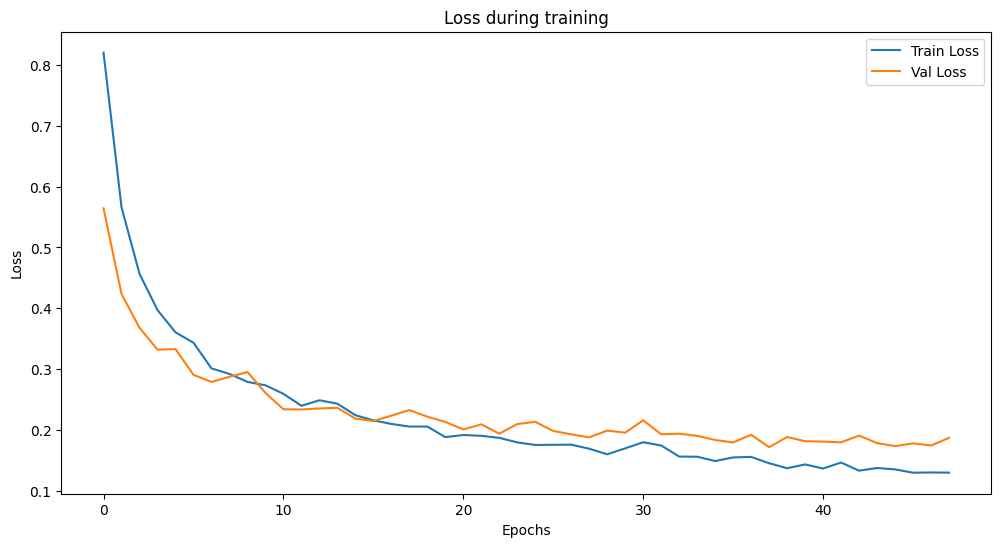

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1793 - mae: 0.2433 - mse: 0.1793 
Validation Loss : 0.17185436189174652
Validation MAE: 0.23982958495616913
Validation MSE: 0.17185436189174652
Validation RMSE: 0.4145532075521145
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step 
Test MAE: 217.53096206565604
Test MSE: 131539.86360073098
Test RMSE: 362.68424779790337
Test R²: 0.7818736278668762
Test CVRMSE: 0.7307554338269403


In [44]:
model2 = Sequential()
model2.add(LSTM(68, activation='tanh', input_shape=(X_train2.shape[1], X_train2.shape[2])))  
model2.add(Dropout(0.2))
model2.add(Dense(24, activation='linear'))   


history2, loss2, mae2, mse2,rmse2,  mae_test2, mse_test2, rmse_test2, r2, cvrmse,predictions2 = train_and_evaluate(model2, X_train2, y_train2, X_test2, y_test2,scaler_temp2,scaler_cons2)